In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

#preprocessing
import sklearn
from sklearn.preprocessing import scale

# Models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations and inspections
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score

In [11]:
df = pd.read_csv('heart_disease_indicators.csv')
df.head()

,HeartDisease/Attack,AgeGroup,GeneralHealthStatus,PhysicalHealthStatus,MentalHealthStatus,LastCheckup,HighBP,HighCholestrol,DiagnosedAsthma,Sex,MaritalStatus,Education,HomeStatus,VETERAN3,EmploymentStatus,ChildrenAtHome,IncomeCategory,Weight,Height,AlchoholDrinksPerDaY,FruitJuicesPerDay,BMI,FruitsEatenPerDay,VegetablesEatenPerDay,SmokingHabits,PhysicalActivity,StrengthActivty,WearsSeatBelt
0,0.0,5.0,0.0,15.0,18.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,1.0,0.0,8.0,0.0,2.0,127.0,1.8,0.0,1.700000e+01,40.2,0.0,2.0,3.0,4.0,0.0,1.0
1,0.0,4.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,2.0,6.0,1.0,0.0,3.0,0.0,1.0,74.8,1.7,0.0,7.000000e+00,25.1,0.0,1.0,1.0,2.0,0.0,0.0
2,0.0,5.0,0.0,30.0,30.0,1.0,1.0,1.0,0.0,2.0,1.0,4.0,1.0,0.0,8.0,1.0,5.0,81.6,1.7,0.0,5.397605e-79,28.2,1.0,0.0,4.0,4.0,0.0,1.0
3,0.0,6.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,1.0,0.0,2.0,0.0,4.0,65.8,1.6,0.0,1.000000e+02,26.5,2.0,6.0,4.0,1.0,0.0,1.0
4,0.0,6.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,2.0,3.0,5.0,1.0,0.0,7.0,0.0,2.0,67.1,1.7,10.0,1.000000e+02,23.9,1.0,1.0,4.0,1.0,0.0,1.0


In [12]:
df['HeartDisease/Attack'].value_counts()
NHA= round(df["HeartDisease/Attack"].value_counts()[0] / len(df) * 100, 2)
HA= round(df["HeartDisease/Attack"].value_counts()[1] / len(df) * 100, 2)
print(f'Percentage of No Heart Disease/Attack: {NHA}%')
print(f'Percentage of Heart Disease/Attacks:   {HA}%')




Percentage of No Heart Disease/Attack: 91.49%
Percentage of Heart Disease/Attacks:   8.51%


([<matplotlib.patches.Wedge at 0x18280065940>,
 [Text(-1.0609219244065382, 0.29059365153686334, 'No HeartDisease/Attack'),
  Text(1.1573693795000433, -0.31701122913184787, 'Heart Disease/Attack')])

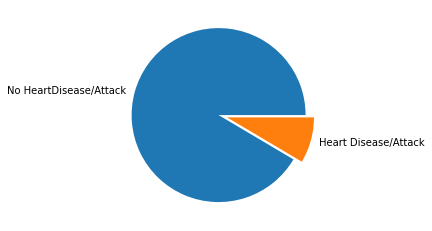

In [13]:
plt.pie([NHA,HA], labels=['No HeartDisease/Attack','Heart Disease/Attack'], explode=[0, 0.1])

(28.5, 0.0)

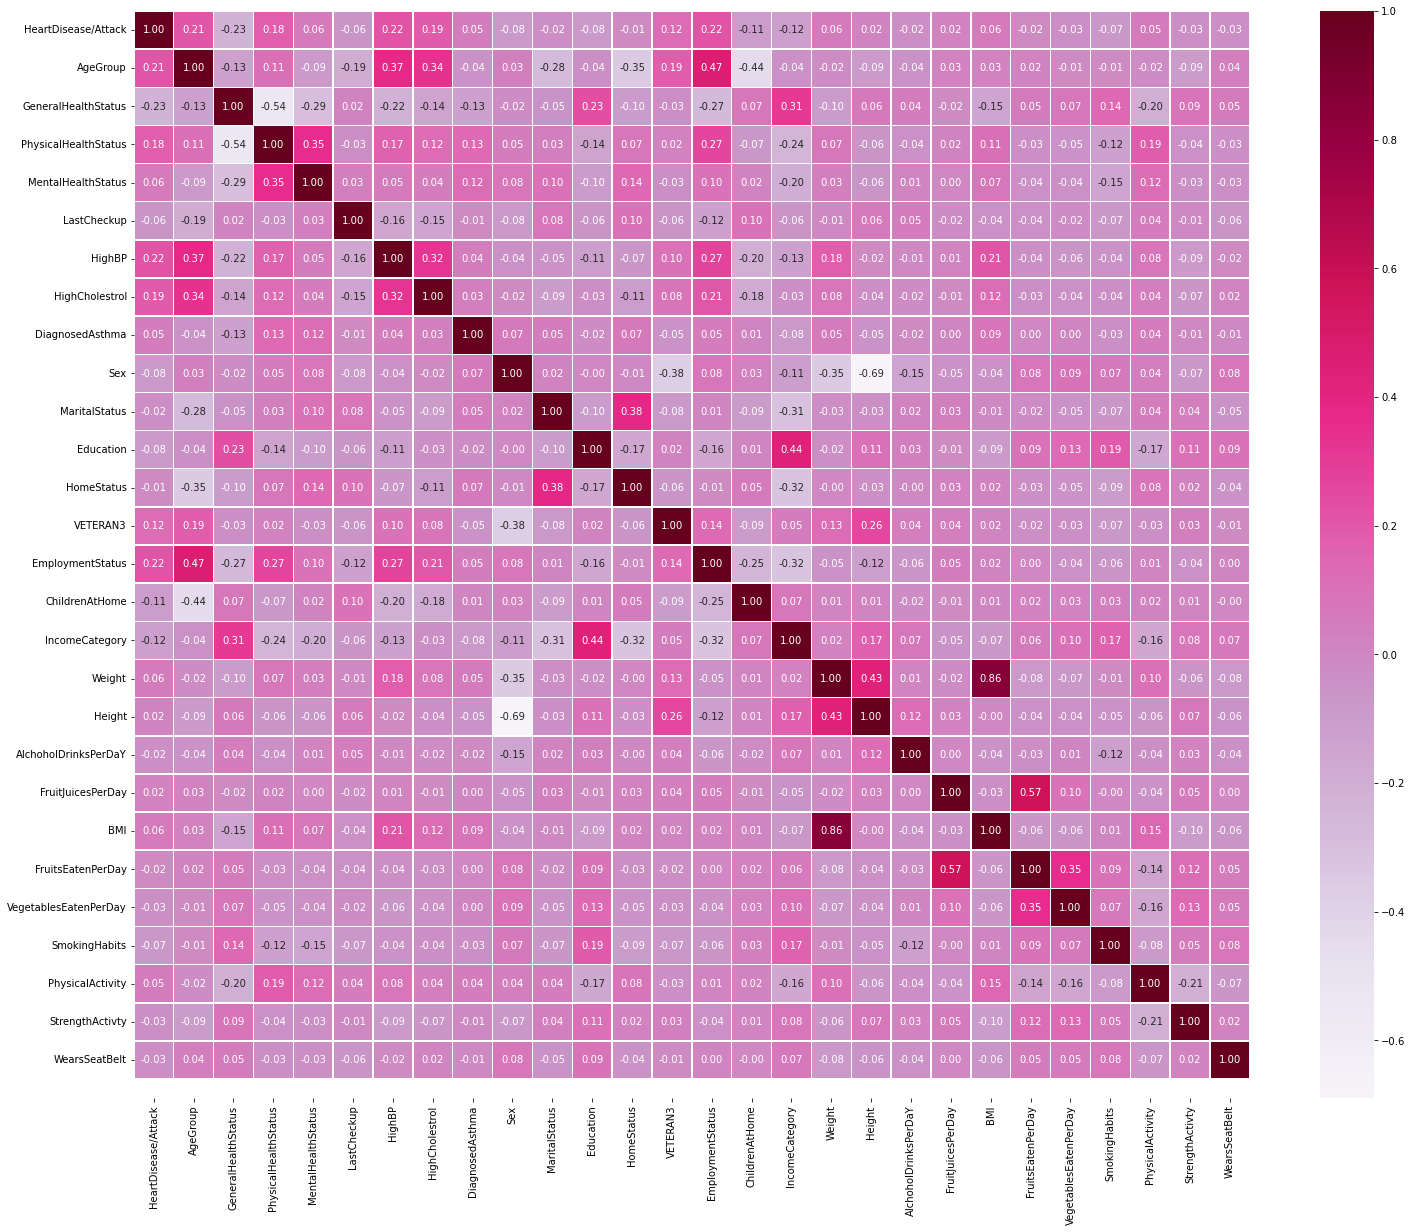

In [14]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(25,20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='PuRd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)

In [87]:
#drop fruit juice and Weight as they are correlated with other features
X = df.drop(['HeartDisease/Attack','Weight',], axis=1)
y = df['HeartDisease/Attack']
features_to_scale=X.columns
# features_to_scale=['Height','BMI','AlchoholDrinksPerDaY','FruitsEatenPerDay','VegetablesEatenPerDay','FruitJuicesPerDay']
scaled_features=pd.DataFrame(scale(X[features_to_scale]),columns=features_to_scale)
X.drop(features_to_scale, axis=1,inplace=True)

X=X.join(scaled_features,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# The 3 models I've chosen for this dataset

models = {'Logistic Regression': LogisticRegression(solver='liblinear',n_job=4),
          'KNN': KNeighborsClassifier(n_jobs=4),
          'Random Forest': RandomForestClassifier(n_jobs=4)}


def fit_and_score_models(models, X_train, X_test, y_train, y_test):
    """
    A function to fit and evaluate the specified ML models
    """
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

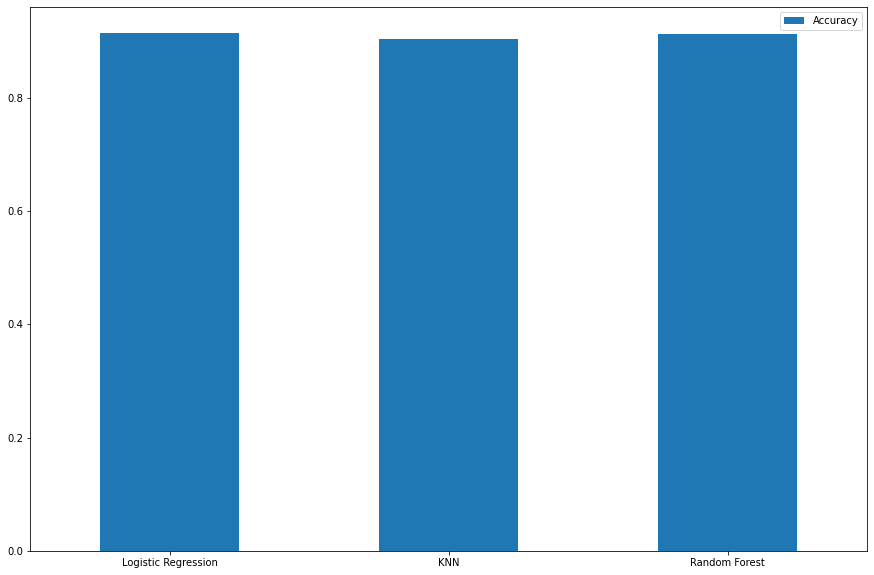

In [89]:
model_scores = fit_and_score_models(models, X_train, X_test, y_train, y_test)

accuray_comparison_graph = pd.DataFrame(model_scores, index=['Accuracy']).T.plot.bar(figsize=(15,10))
plt.xticks(rotation=0);

In [90]:
print(model_scores)

{'Logistic Regression': 0.914121475412544, 'KNN': 0.903533259551694, 'Random Forest': 0.9132129701514726}


In [91]:
RFC= RandomForestClassifier(n_jobs=4)
RFC.fit(X_train,y_train)


RandomForestClassifier(n_jobs=4)

In [92]:
RFC_score=RFC.score(X_test, y_test)
print(RFC_score)
print(RFC.score(X_train,y_train))

0.9133285980937907
0.9999710930144204


Text(0, 0.5, 'Mean decrease in impurity')

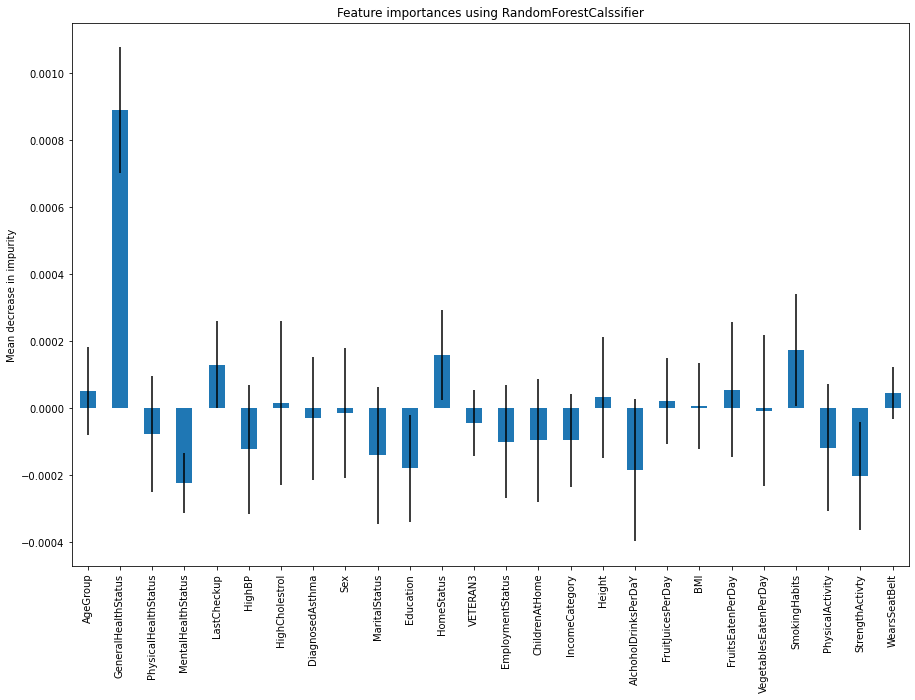

In [94]:
#permutation importance
PI = permutation_importance(RFC,X_test,y_test,n_repeats=10,n_jobs=4,random_state=42)
std= PI.importances_std

RFC_PI = pd.Series(PI.importances_mean, index=X.columns)

fig2, ax2 = plt.subplots(figsize=(15,10))
RFC_PI.plot.bar(yerr=std,ax=ax2)
ax2.set_title("Feature importances using RandomForestCalssifier")
ax2.set_ylabel("Mean decrease in impurity")

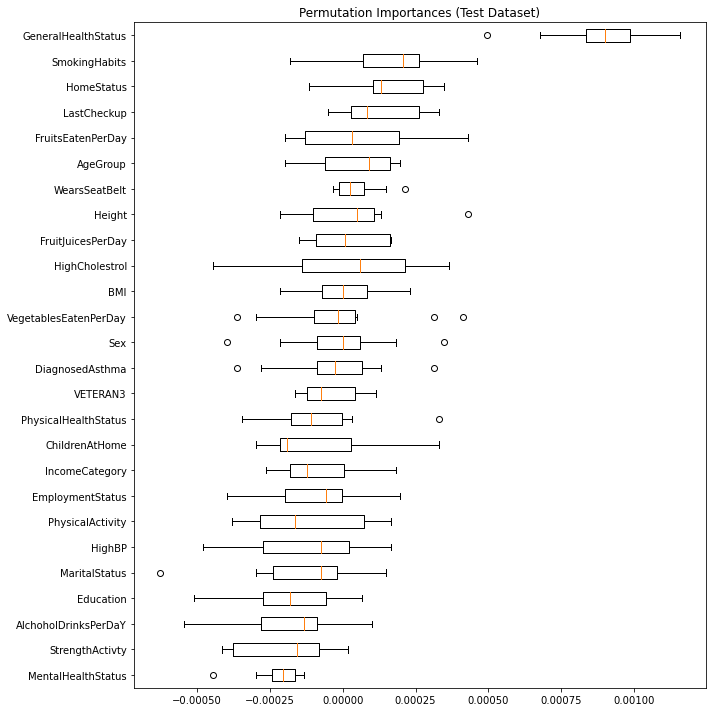

In [95]:
sorted_idx = PI.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(
    PI.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx]
)
ax.set_title("Permutation Importances (Test Dataset)")
fig.tight_layout()
plt.show()